In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Levi Kaster and Matthew Desantis 

Student ID: 486536 and 488103

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M4] Linear Regression (if applicable - depends on problem/dataset)
* [M5] Linear Classification (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [6]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the given source/link (cf. `README.md`) and be sure to save the data in a folder called `data` under the `utility` directory.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("utility/data/rideshare_kaggle.csv")
pd.options.display.max_columns = 60

In [9]:
print("Shape: " + str(data.shape))
data.columns
print("number of continuous numerical data points: " + str(sum([1 if x == 'float64' else 0 for x in data.dtypes])))
print("number of discrete numerical data points: " + str(sum([1 if x == 'int64' else 0 for x in data.dtypes])))
print("number of categorical data points: " + str(sum([1 if x == 'object' else 0 for x in data.dtypes])))

Shape: (693071, 57)
number of continuous numerical data points: 29
number of discrete numerical data points: 17
number of categorical data points: 11


In [10]:
data.timestamp.describe()

count    6.930710e+05
mean     1.544046e+09
std      6.891925e+05
min      1.543204e+09
25%      1.543444e+09
50%      1.543737e+09
75%      1.544828e+09
max      1.545161e+09
Name: timestamp, dtype: float64

<!-- BEGIN QUESTION -->

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

The first step that we are taking below is to change the feature containing the data and time to a "datetime" data type, since it is currently a different data type. This will make it easier for us to distinguish between the data and time down the road. 

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])

Next, the ID column of the dataset, including product id was removed, since this will not be of any use to us during our data analysis. This is stored in a new variabled named data_noID.

In [12]:
# source: https://cmdlinetips.com/2020/05/drop-multiple-columns-in-pandas-dataframe/#:~:text=We%20can%20use%20Pandas%20drop,be%20dropped%20as%20a%20list.
data_noID = data.drop(['id', 'product_id'], axis=1)
data_noID.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


During this step it was unclear to me what "apparentTemperatureHigh" and "apparentTemperatureLow" meant, so I looked this up while performing the data wrangling, and discovered that apparent temperature meant the temperature that it felt like, using humidity and wind chill. This helped me to better understand the dataset, and determine that these could be useful in the future.

Additionally while viewing the first 5 rows of the datase, I noticed that there was a column for timezone, which seemed unneccesary because all of these data points are from Boston. In the cell below I use the describe function to first ensure that every datapoint has one possible value for this feature, and then I remove this feature because this column will be of no use to us because it has the same value for every datapoint. For similar reasons I also determined that the latitude and longitude features would be of little use, especially since the source and destination of the rides were provided. The new data was stored in a variable called data_noID_noTimezone.

In [13]:
print(data_noID.select_dtypes(include='object').describe().transpose())
data_noID_noTimezone = data_noID.drop(['timezone', 'latitude', 'longitude'], axis=1)

                count unique                                  top    freq
timezone       693071      1                     America/New_York  693071
source         693071     12                   Financial District   58857
destination    693071     12                   Financial District   58851
cab_type       693071      2                                 Uber  385663
name           693071     13                               UberXL   55096
short_summary  693071      9                            Overcast   218895
long_summary   693071     11   Mostly cloudy throughout the day.   202340
icon           693071      7                              cloudy   218895


Next, I determined that the timestamps of different events, such as "windGustTime" and "timestamp" would be of no use to our data exploration and hypothesis, because this time data can easily be interpreted from the "datetime" feature. In the end, the timestamp features seemed to have no practical application for the data analysis and exploration that we would be conducting as a part of this project. As a result of this, I removed all of the features containing timestamps, which is done below. I stored this final version of the dataset in a new variable "wrangledData".

In [14]:
wrangledData = data_noID_noTimezone.drop(['timestamp','windGustTime','temperatureHighTime', 'temperatureLowTime', \
'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', \
'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis=1)
wrangledData.shape

(693071, 39)

This final initial version of the wrangled dataset had 39 columns; however, after working on exploring the dataset more, another issue that needed fixing was recognized. For example I noticed that there were two columns that contained visibility data and that this visibility data appeared to be the same in both columns. As a result of this, I removed one of the features containing visibility in the cell below

In [15]:
wrangledData = wrangledData.drop(['visibility.1'], axis=1)

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

In [16]:
wrangledData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,693071.0,11.619137,6.948114,0.000,6.000,12.0000,18.0000,23.0000
day,693071.0,17.794365,9.982286,1.000,13.000,17.0000,28.0000,30.0000
month,693071.0,11.586684,0.492429,11.000,11.000,12.0000,12.0000,12.0000
price,637976.0,16.545125,9.324359,2.500,9.000,13.5000,22.5000,97.5000
distance,693071.0,2.189430,1.138937,0.020,1.280,2.1600,2.9200,7.8600
surge_multiplier,693071.0,1.013870,0.091641,1.000,1.000,1.0000,1.0000,3.0000
temperature,693071.0,39.584388,6.726084,18.910,36.450,40.4900,43.5800,57.2200
apparentTemperature,693071.0,35.881222,7.918707,12.130,31.910,35.9000,40.0800,57.2200
precipIntensity,693071.0,0.008922,0.026901,0.000,0.000,0.0000,0.0000,0.1447
precipProbability,693071.0,0.146076,0.328938,0.000,0.000,0.0000,0.0000,1.0000


In [17]:
wrangledData.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340
icon,693071,7,cloudy,218895


The first step that I took to begin profiling the data and exploring it's variables, was to use the .describe() function to get a better idea of what kind of data is in the dataset and how it might look. I was particularly interested in the Price data, since this would probably be one of the most important features if this dataset was going to be used to make decisions in a buisness setting. Additionally describing these features was extremely helpful for understanding the categorical features, particularly because it showed the amount of unique categories for each feature. For example, I learned that there were only 9 different "short summaries" for the weather.

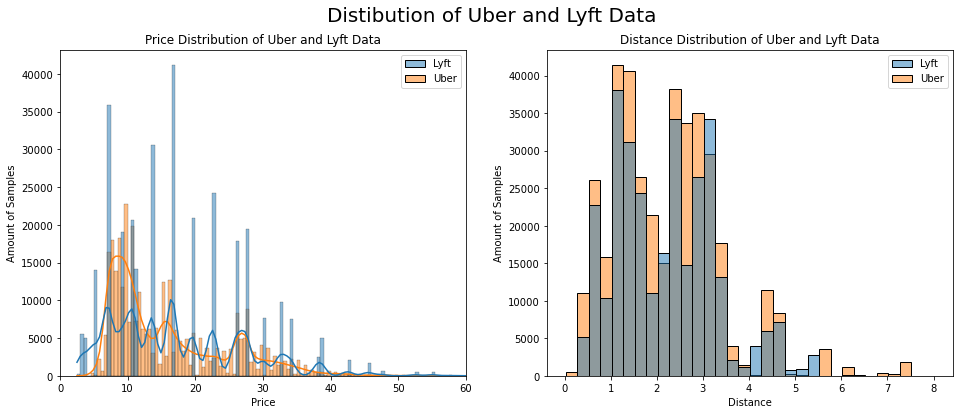

In [18]:
# Source for Seaborn overlayed Histogram: https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn
# Additional Source: https://stackoverflow.com/questions/51579215/remove-seaborn-lineplot-legend-title

import seaborn as sns 
plt.figure(figsize=(16, 6))
plt.suptitle("Distibution of Uber and Lyft Data", fontsize=20)

plt.subplot(121)
x = sns.histplot(data=wrangledData, x="price", hue='cab_type', kde=True, binwidth=.5)
x.legend_.set_title(None)
plt.xlim(0.00,60.00)
plt.xlabel('Price')
plt.ylabel('Amount of Samples')
plt.title('Price Distribution of Uber and Lyft Data')

plt.subplot(122)
x = sns.histplot(data=wrangledData, x="distance", hue='cab_type', binwidth=.25)
x.legend_.set_title(None)
plt.xlabel('Distance')
plt.ylabel('Amount of Samples')
plt.title('Distance Distribution of Uber and Lyft Data')

plt.show()

In order to continute improving my understanding of the dataset, I decided to get a feel for the distibution of the price data and the distance data, since these were two numerical features that I anticipated to be important in the dataset. As described in class a histogram is a good way to get the distibution of data, so this was the initial graph that I set out to create. I decided to use seaborn to do this, and I wanted to find a way to split the data up between uber and lyft data points. In the end I created the overlayed histograms that are seen above, which was one of the plots that we were taught in class, but that we have not yet created in lab or the homework. One interesting thing I noticed from the price distribution plot is that the uber prices seemed to take on any value, but that the lyft prices appeared to be centered around specific repeating values, which led to the high bars seen on the graph. Additionally it appeared to me the that lyft prices may be slightly higher, simply becuase many of the uber prices seemed to centered around 10, whereas the lyft prices were more evenely distributed to higher values.

Next, I looked at the Distance Distribution plot. This plot was less interesting to me because both uber and lyft appeared to have the same range of distance. Yes the distibutions followed were not exactly the same, but they appeared similar enough that I believed that the average distance for uber rides and for lyft rides were likely to be nearly the same. 

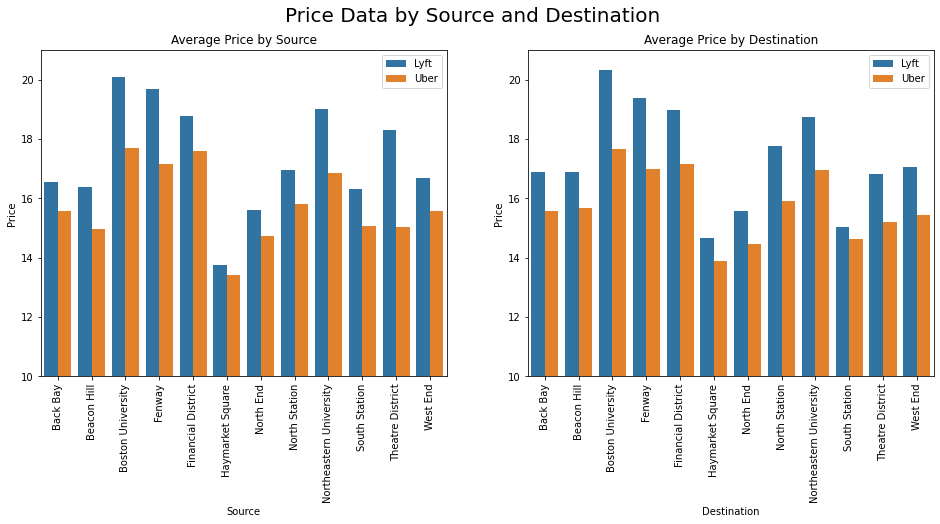

In [19]:
plt.figure(figsize=(16, 6))
plt.suptitle("Price Data by Source and Destination", fontsize=20)

plt.subplot(121)
source_averages = wrangledData[['source', 'cab_type', 'price','name']] \
    .groupby(['source','cab_type'], as_index=False) \
    .aggregate('mean')
source_averages = source_averages.rename({'name': 'means'}, axis=1)
y = sns.barplot(x = "source", hue = "cab_type", y = "price", data = source_averages)
y.legend_.set_title(None)
plt.xticks(rotation=90)
plt.title('Average Price by Source')
plt.ylim(10.00,21.00)
plt.xlabel('Source')
plt.ylabel('Price')

plt.subplot(122)
destination_averages = wrangledData[['destination', 'cab_type', 'price','name']] \
    .groupby(['destination','cab_type'], as_index=False) \
    .aggregate('mean')
destination_averages = destination_averages.rename({'name': 'means'}, axis=1)
y = sns.barplot(x = "destination", hue = "cab_type", y = "price", data = destination_averages)
y.legend_.set_title(None)
plt.xticks(rotation=90)
plt.ylim(10.00,21.00)
plt.title('Average Price by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

Next, because the results from the first histogram implied that lyft prices may be slightly higher, I wanted to investigate whether this was the case more in depth. I wanted to show this in a graph, and investigate how this might change in relation to a categorical variable, which led me to create the barplot titled "Average Price by Source". This barplot showed that I was correct in guessing that lyft was generally more expensive than uber, and also showed that prices differ widly by source of the ride. For example the price of a ride from "Haymarket Square" was just under 14 dollars, whereas the price of a ride coming from Boston University was much higher, at likely over 18 dollars.

Seeing that the prices differed widely by source, I wondered if this would also be the case for the different destinations of the ride. So I created a similar barplot as the first one to investigate this, which can be seen on the right. This followed almost the exact same pattern as the one on the left. Places that were expensive to leave from were also expensive to arrive at. Still though some minor differences between the graphs can be noted. For example, the theatre district is about 1 dollar more expensive as a destination than when it is a source. 

Finally, I also created 3 similar plots to the one above based on the weather categories, specifically the 'short_summary' category. In these graphs I looked at the number of data points for each weather category, the average ride price by weather category, and the average ride distance by weather category. The most notable information that I gained from these plots was that most of the rides in the dataset occured when it was overcast or cloudy. There was not a difference in price or distance traveled based on the weather. Since this information was not interesting, I did not include these graphs that I made.

In [20]:
precip_and_temperature = wrangledData[['price','distance','temperature','apparentTemperature','precipIntensity',\
'precipProbability', 'humidity', 'temperatureHigh', 'temperatureLow']]
wind_and_visibility = wrangledData[['price','distance', 'windSpeed', 'pressure', 'ozone', \
'moonPhase', 'visibility', 'uvIndex', 'cloudCover']]

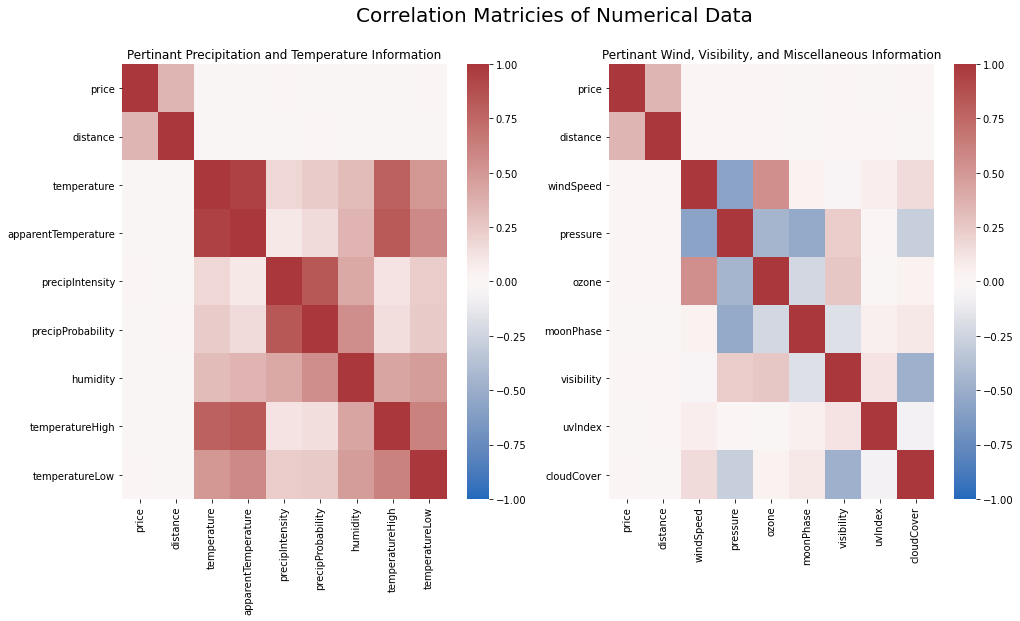

In [21]:
plt.figure(figsize=(16, 8))
plt.suptitle("Correlation Matricies of Numerical Data", fontsize=20)

plt.subplot(121)
sns.heatmap(precip_and_temperature.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Pertinant Precipitation and Temperature Information')

plt.subplot(122)
sns.heatmap(wind_and_visibility.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=90)
plt.title('Pertinant Wind, Visibility, and Miscellaneous Information')
plt.show()

The next step that I wanted to take was to compare the relationship between some of the numerical features, and intitally I tried to do this through creating a few scatterplots; however, after creating these scatter plots I quickly realized that there were too many data points and that the plots were too messy to derive any real relationships from them. When going back through the lecutures and previous worksheets, I concluded that a correlation matrix would be the best way to broadly check the relationships between the different numerical features. As a result I selected the features that I though would be interesting to compare and created the above correlation matricies. I decided to create two correlation matricies because including all the information in a single matrix caused it to be more jumbled and difficult to understand.

Looking at the results of the correlation matrix, the first thing that jumps out to me is that the only feature that is correlated with price is the distance feature. This makes sense longer rides should generally cost more since it requires more time from the driver; however, it was suprising to me that none of the weather variables were correlated with cost. I had speculated that on low visiblity or rainy days there would be less drivers and that the price would increase as a result, but no correlation was seen. Most of the strong correlations that were seen made sense and were intuitive, 'apparent temperature' (what it feels like outside) was very strongly correlated with 'temperature.' Other correlations between different weather features were also seen, and intuitively made sense. One surprising correlation I saw was that 'moonPhase' has a somewhat stong negative correlation with 'pressue.' I had anticipated that the moonphase would have almost no correlation with anything, since the moon is so far removed from Boston, but we see that this is not the case. 

In [22]:
uber = wrangledData[wrangledData['cab_type'] == 'Uber']
lyft = wrangledData[wrangledData['cab_type'] == 'Lyft']
lyft.shape

(307408, 38)

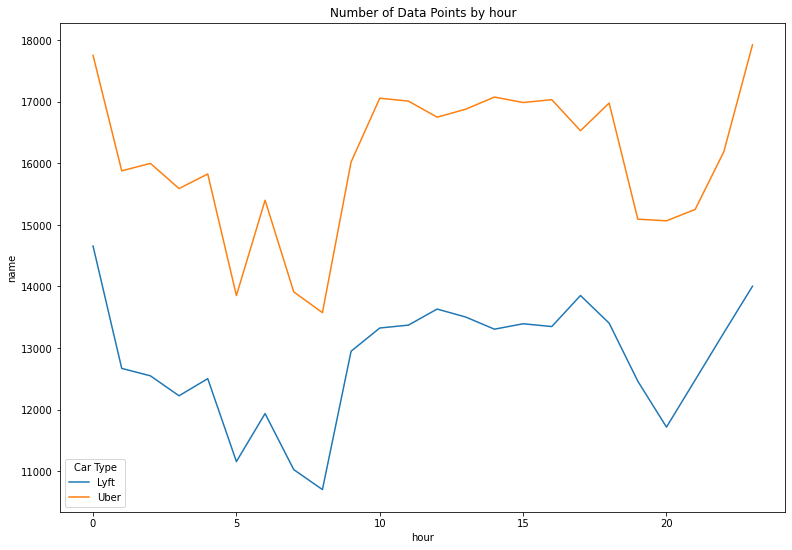

In [23]:
# source: https://seaborn.pydata.org/generated/seaborn.lineplot.html

plt.figure(figsize=(13, 9))

plt.title('Number of Data Points by hour')
car_type = wrangledData[['hour', 'cab_type','name']] \
    .groupby(['cab_type','hour'], as_index=False) \
    .aggregate('count')
car_type_ = car_type.rename({'name': 'Amount'}, axis=1)
x1 = sns.lineplot(data = car_type, hue='cab_type', x='hour',y='name')
x1.legend_.set_title("Car Type")
plt.show()




Next, I wanted to view some of the data in regards to the hour of the data, and specifically I felt that the number of rides taken might vary over the course of a day. I also wondered if the type of car used for ubering differed by the time of day as well, for example maybe the "Black" cars were more common at night, since these cars are supposed to be driven by safe professional drivers. In order to answer these questions I created the line graphs shown above, but instead of being split simply by uber and lyft, it was split by car type as well. However, from this graph I noticed that the data seemed to have been deliberatly selected so that there was the around the same amount of each car type at all hours, depite the total number of cars differing by hour. As a result, I modified the plot to only include lines for uber and for lyft, since the 'name' feature did not include any useful information. This resulted in the final plot above.

From this plot, we see that at every hour there are more Uber than Lyft data points, which makes sense because we determined that there were more Uber data points in one of the first plots we made. We also see the hours from which we have the most data, meaning the times when the most rides occured, where we see some interesting results. We see that the hours with the most rides are at hour 23, right before midnight, and at hour 0, right after midnight. This is a Time when many people might call for ubers/lyfts as they are leaving bars so that they can get home safely, so it makes sense to see elevated data points during these times. We also an increased amount of data points from around 9am - 5pm, which makes sense because this is when people are going to be doing most of the days work, and they might need a car to do so. 

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

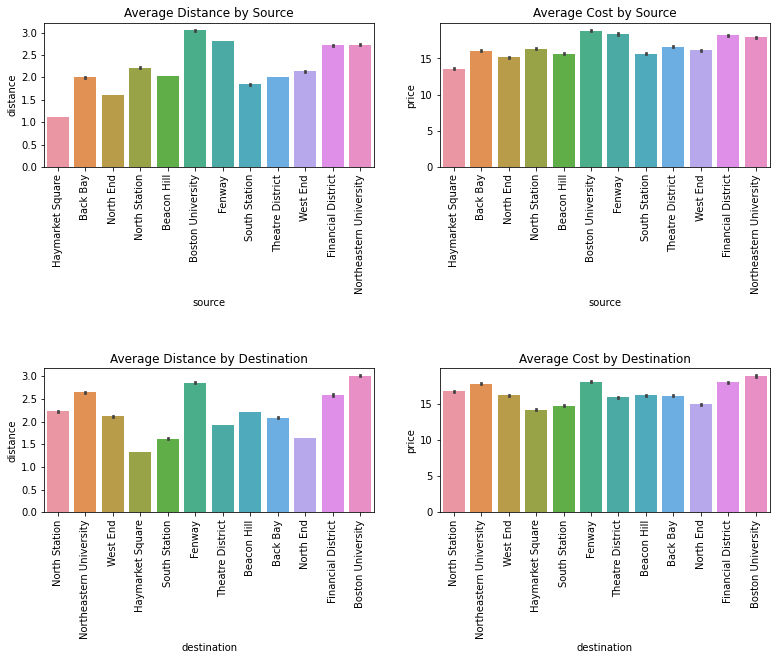

In [244]:
plt.figure(figsize=(13,9))


plt.subplot(321)
plt.title('Average Distance by Source')
DbS = sns.barplot(data = wrangledData, x = 'source', y = 'distance')
plt.xticks(rotation = 90)

plt.subplot(322)
plt.title('Average Cost by Source')
CbS = sns.barplot(data = wrangledData, x = 'source', y = 'price')
plt.xticks(rotation = 90)

plt.subplot(325)
plt.title('Average Distance by Destination')
DbS = sns.barplot(data = wrangledData, x = 'destination', y = 'distance')
plt.xticks(rotation = 90)

plt.subplot(326)
plt.title('Average Cost by Destination')
CbS = sns.barplot(data = wrangledData, x = 'destination', y = 'price')
plt.xticks(rotation = 90)




plt.show()



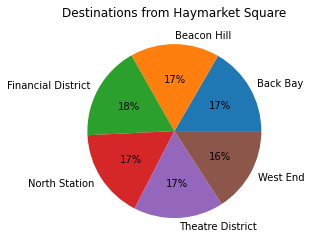

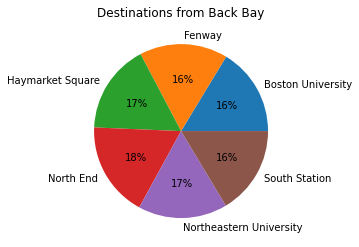

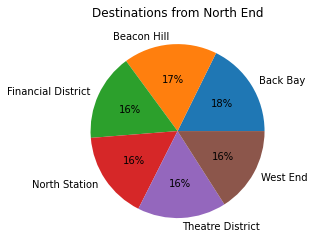

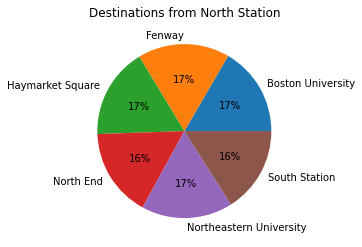

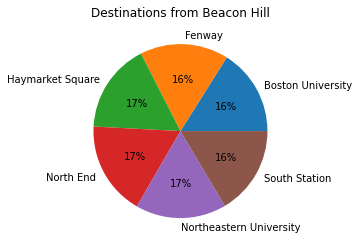

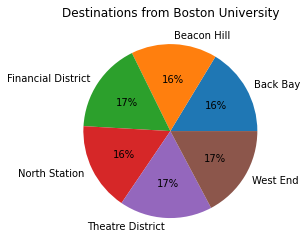

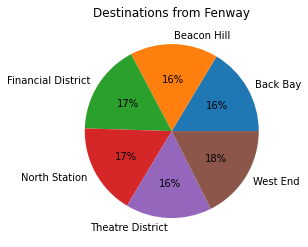

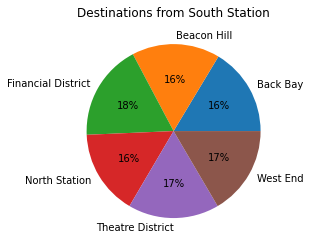

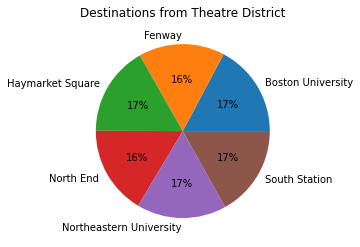

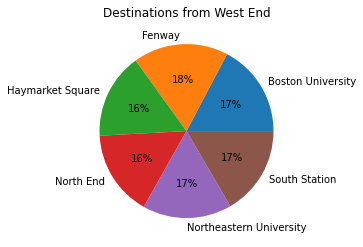

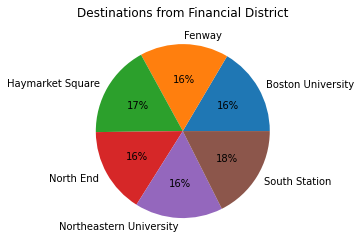

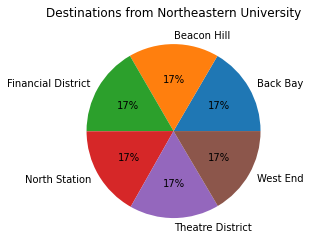

In [245]:
sources = ['Haymarket Square',
'Back Bay',
'North End',
'North Station',
'Beacon Hill',
'Boston University',
'Fenway',
'South Station',
'Theatre District',
'West End',
'Financial District',
'Northeastern University']


for source in sources:
    wrangledData[wrangledData['source']==source].groupby(['destination']).size().plot(kind='pie', autopct='%1.0f%%', ylabel='', title = 'Destinations from '+ source)
    plt.show()







### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

_Note: There are no automatic tests for this assignment, this is simply checking if you imported otter._

In [24]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [25]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)